In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [19]:
train_cols = ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','OverallQual','OverallCond','RoofStyle','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','HeatingQC','CentralAir','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','GarageType','GarageFinish','GarageCond','PavedDrive','WoodDeckSF','PoolArea','MiscVal', 'SaleType','SaleCondition','SalePrice']
test_cols = ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','OverallQual','OverallCond','RoofStyle','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','HeatingQC','CentralAir','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','GarageType','GarageFinish','GarageCond','PavedDrive','WoodDeckSF','PoolArea','MiscVal', 'SaleType','SaleCondition']

In [20]:
train = pd.read_csv('train.csv',usecols = train_cols)

In [21]:
train.drop_duplicates(inplace = True)

In [22]:
test = pd.read_csv('test.csv', usecols = test_cols)

In [23]:
#test.drop_duplicates(inplace = True)

In [24]:
print(test.shape)
print(train.shape)

(1459, 36)
(1460, 37)


In [25]:
train.columns ^ test.columns

Index(['SalePrice'], dtype='object')

In [26]:
labels = np.array(train['SalePrice'])
train = train.drop('SalePrice',axis = 1)

In [27]:
labels

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [28]:
print(labels.shape)
print(train.shape)

(1460,)
(1460, 36)


In [29]:
train.GarageFinish.fillna('NA',inplace = True)
train.GarageType.fillna('NA',inplace = True)
train.GarageCond.fillna('NA',inplace = True)
train.BsmtQual.fillna('NA',inplace = True)
train.BsmtCond.fillna('NA',inplace = True)
test.SaleType.fillna('Oth',inplace = True)
test.Utilities.fillna('NoSeWa',inplace = True)
test.BsmtQual.fillna('NA',inplace = True)
test.BsmtCond.fillna('NA',inplace = True)
test.GarageFinish.fillna('NA',inplace = True)
test.GarageType.fillna('NA',inplace = True)
test.GarageCond.fillna('NA',inplace = True)
test.Functional.fillna('Typ',inplace = True)
test.MSZoning.fillna(method='ffill',inplace = True)

In [30]:
print(train.shape)
print(test.shape)

(1460, 36)
(1459, 36)


In [31]:
pd.set_option('display.max_rows',None)

In [32]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [33]:
print(train.shape)
print(test.shape)

(1460, 155)
(1459, 155)


In [34]:
train_features,test_features,train_labels,test_labels = train_test_split(train,labels,test_size = 0.25, random_state = 42)

In [35]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\firas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
rf = RandomForestRegressor(n_estimators = 1000, max_features=34, random_state = 42)

In [37]:
rf.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=34, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [38]:
predictions = rf.predict(test_features).round()

In [39]:
pred = rf.predict(train).round()

In [40]:
from sklearn import metrics
print(metrics.mean_absolute_error(labels,pred).round())

10187.0


In [41]:
mean_labels = np.mean(labels)
mean_pred = np.mean(pred)

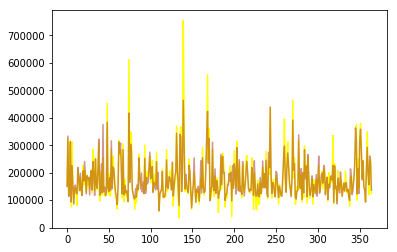

In [42]:
%matplotlib inline
plt.plot(test_labels,label = 'actual',color = 'yellow');
plt.plot(predictions,label = 'predictions',color = 'brown',alpha = 0.5);

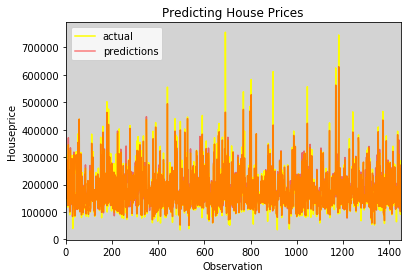

In [43]:
%matplotlib inline
plt.plot(labels,label = 'actual',color = 'yellow');
plt.plot(pred,label = 'predictions',color = 'red',alpha =0.5);
ax = plt.gca()
ax.set_facecolor("lightgrey")
plt.legend()
plt.xlim(0,1450)
plt.title("Predicting House Prices")
plt.xlabel("Observation")
plt.ylabel("Houseprice")
plt.savefig("Housing.png")

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
print("%.2f"%r2_score(labels,pred))

0.94


In [45]:
price_pred = pd.DataFrame(pred)
actual_price= pd.DataFrame(labels)
compare = pd.concat([actual_price,price_pred],axis = 1)
compare.columns = ['actual_price','predicted_price']
compare.predicted_price = compare.predicted_price.astype("Int64")

In [47]:
compare.head(15)

,actual_price,predicted_price
0,208500,205152
1,181500,175864
2,223500,220545
3,140000,154138
4,250000,262658
5,143000,148149
6,307000,289624
7,200000,206296
8,129900,136472
9,118000,123642


In [74]:
new_price_col = pd.DataFrame(rf.predict(test),columns=['Predicted_Saleprices'])

new_price_col

,Predicted_Saleprices
0,125408.705000
1,165901.975000
2,180924.344000
3,185828.671000
4,215191.842000
5,186681.505000
6,171972.452000
7,175637.831000
8,173942.238000
9,119520.967000


In [77]:
final = pd.concat([test,new_price_col], axis = 1)
final.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF',
       'PoolArea',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'Predicted_Saleprices'],
      dtype='object', length=156)

In [62]:
#final = final.rename(columns={"                       0":"Predicted_Saleprices"})

In [78]:
final[["LotArea", "OverallQual", "BedroomAbvGr", "KitchenAbvGr", "Predicted_Saleprices"]].head(15)
#final.head

,LotArea,OverallQual,BedroomAbvGr,KitchenAbvGr,Predicted_Saleprices
0,11622,5,2,1,125408.705000
1,14267,6,3,1,165901.975000
2,13830,5,3,1,180924.344000
3,9978,6,3,1,185828.671000
4,5005,8,2,1,215191.842000
5,10000,6,3,1,186681.505000
6,7980,6,3,1,171972.452000
7,8402,6,3,1,175637.831000
8,10176,7,2,1,173942.238000
9,8400,4,2,1,119520.967000


In [59]:
final.columns

Index([           'MSSubClass',               'LotArea',
                 'OverallQual',           'OverallCond',
                   'GrLivArea',          'BedroomAbvGr',
                'KitchenAbvGr',          'TotRmsAbvGrd',
                  'WoodDeckSF',              'PoolArea',
       ...
                'SaleType_New',          'SaleType_Oth',
                 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand',  'SaleCondition_Alloca',
        'SaleCondition_Family',  'SaleCondition_Normal',
       'SaleCondition_Partial',                       0],
      dtype='object', length=156)